# **Projet P6 - révisions et pratique**

Vous allez travailler sur des données extraites de IMDB. On a déjà un peu manipulé des données de films donc vous serez pas complètement perdus comme ça. La variable d'intérêt sera la notation IMDB des films. En effet le succès commercial d'un film n'implique pas nécessairement sa qualité et il convient donc d'aller chercher plus loin que le simple profit dégagé d'une production cinématographique...
À vous !!

Les **objectifs** de ce projet sont multiples :
1. Réviser
2. Pratiquer
3. Vous auto-évaluer et vous évaluer (pour nous)
4. Vous rassurer et vous permettre de réaliser ce que vous savez faire pour pouvoir en parler

1. [Import des librairies](#import_lib)<br>
2. [Import des données](#import_data)<br>
3. [Nettoyage des donnéees](#data_cleaning)<br>
4. [Analyse exploratoire](#exploration)<br>
5. [Pré-traitement](#preprocess)<br>
6. [Une régression linéaire](#reglin)<br>
7. [D'autres modèles de régression](#autres_reg)<br>
8. [De la régression à la classification](#reg_to_class)<br>
9. [Une régression logistique](#reglog)<br>
10. [D'autres modèles de classification](#autre_class)<br>
11. [En option](#option)<br>
    11.1 [Un outil de recommandation](#reco)<br>
    11.2 [Sauvegarder un modèle](#save)<br>
    11.3 [Analyse en composantes principales](#acp)<br>

<a id='import_lib'></a>

## **1. Import des libraries**

**À FAIRE**

> Importer dans la cellule l'ensemble des librairies nécessaires à votre travail. L'idée n'est pas de savoir immédiatement tout ce dont vous aurez besoin mais de faire des aller-retours pour y ajouter vos librairies petit à petit. L'intérêt est une meilleure lisibilité pour un lecteur extérieur qui, en quelques lignes d'import, pourra déjà avoir une idée de ce qui a été fait.

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id='import_data'></a>

## **2. Import des données**

**À FAIRE**

> Importer les données `5000_movies_bis.csv` disponible à la racine de ce document.  
> Afficher les 7 premières lignes et **toutes** les colonnes.    
> Répondre aux questions suivantes (répondez à toutes les questions dans une seule cellule Markdown mais évidemment le code vous ayant permis d'extraire ces informations doit être présent):
>- combien y a-t-il d'observations/de variables ?
>- sur combien d'années se répartissent les données ?
>- combien de pays sont représentés ?
>- combien de réalisateurs différents dans la base ?
>- combien d'acteurs et d'actrices différentes ?

In [145]:
data = pd.read_csv('5000_movies_bis.csv')
data

,color,director_name,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [146]:
data.title_year.describe()

count    4935.000000
mean     2002.470517
std        12.474599
min      1916.000000
25%      1999.000000
50%      2005.000000
75%      2011.000000
max      2016.000000
Name: title_year, dtype: float64

In [147]:
country = data.country.unique()
len(country)

66

In [148]:
director = data.director_name.unique()
len(director)

2399

In [149]:
actor = data.actor_2_name.unique()
len(actor)

3033

Il y a 5043 lignes et 28 colomnes, dont les films s'étendent de 1916 à 2016 avec 66 pays représentés, qui contiennent 2399 directeur et 3033 acteurs différents.

<a id='data_cleaning'></a>

## **3. Nettoyage des données**

**À FAIRE**

> Vous allez dans cette partie vous occuper de faire les opérations de nettoyage sur les données. Cela implique donc de regarder en détail :
>- les doublons
>- les variables (à supprimer, à modifier etc...)
>- les valeurs manquantes
>- les zéros
> 
>Ajouter une courte explication des décisions que vous prendrez (gestion des valeurs manquantes, suppression ou modification de certaines variables, etc...).

#### **Les doublons**

In [150]:
dupli = data.duplicated()
data[dupli].head()

,color,director_name,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes
137,Color,David Yates,248.0,110.0,282.0,103.0,Alexander Skarsgård,11000.0,124051759.0,Action|Adventure|Drama|Romance,...,239.0,English,USA,PG-13,180000000.0,2016.0,10000.0,6.6,2.35,29000
187,Color,Bill Condon,322.0,115.0,386.0,12000.0,Kristen Stewart,21000.0,292298923.0,Adventure|Drama|Fantasy|Romance,...,329.0,English,USA,PG-13,120000000.0,2012.0,17000.0,5.5,2.35,65000
204,Color,Hideaki Anno,1.0,120.0,28.0,12.0,Shin'ya Tsukamoto,544.0,NaN,Action|Adventure|Drama|Horror|Sci-Fi,...,13.0,Japanese,Japan,NaN,NaN,2016.0,106.0,8.2,2.35,0
303,Color,Joe Wright,256.0,111.0,456.0,394.0,Cara Delevingne,20000.0,34964818.0,Adventure|Family|Fantasy,...,186.0,English,USA,PG,150000000.0,2015.0,548.0,5.8,2.35,24000
389,Color,Josh Trank,369.0,100.0,128.0,78.0,Reg E. Cathey,596.0,56114221.0,Action|Adventure|Sci-Fi,...,695.0,English,USA,PG-13,120000000.0,2015.0,360.0,4.3,2.35,41000


In [151]:
test = data.director_name == 'Josh Trank'
data[test]

,color,director_name,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes
249,Color,Josh Trank,369.0,100.0,128.0,78.0,Reg E. Cathey,596.0,56114221.0,Action|Adventure|Sci-Fi,...,695.0,English,USA,PG-13,120000000.0,2015.0,360.0,4.3,2.35,41000
389,Color,Josh Trank,369.0,100.0,128.0,78.0,Reg E. Cathey,596.0,56114221.0,Action|Adventure|Sci-Fi,...,695.0,English,USA,PG-13,120000000.0,2015.0,360.0,4.3,2.35,41000
2932,Color,Josh Trank,414.0,89.0,128.0,371.0,Alex Russell,963.0,64572496.0,Drama|Sci-Fi|Thriller,...,471.0,English,USA,PG-13,12000000.0,2012.0,465.0,7.1,1.85,32000


#### **Suppression de variables**

In [152]:
data = data.drop_duplicates()
data

,color,director_name,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


#### **Les valeurs manquantes et les zéros**

In [153]:
data.isnull().sum()

color                      19
director_name             103
num_critic_for_reviews     49
duration                   15
director_fb_likes         103
actor_3_fb_likes           23
actor_2_name               13
actor_1_fb_likes            7
gross                     671
genres                      0
actor_1_name                7
movie_title                 0
num_voted_users             0
cast_total_fb_likes         0
actor_3_name               23
facenumber_in_poster       13
plot_keywords             152
movie_imdb_link             0
num_user_for_reviews       21
language                   12
country                     5
content_rating            301
budget                    401
title_year                107
actor_2_fb_likes           13
imdb_score                  0
aspect_ratio              327
movie_fb_likes              0
dtype: int64

In [154]:
data.eq(0).sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_fb_likes          897
actor_3_fb_likes            89
actor_2_name                 0
actor_1_fb_likes            26
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_fb_likes         33
actor_3_name                 0
facenumber_in_poster      2136
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_fb_likes            55
imdb_score                   0
aspect_ratio                 0
movie_fb_likes            2162
dtype: int64

**Gestion des zéros**

**Gestion des NaN**

Suppression des lignes ou le NAN est le plus élevé

In [155]:
filter2 = pd.isnull(data.gross)
data = data.drop(data[filter2].index, axis=0)

filter3 = pd.isnull(data.budget)
data = data.drop(data[filter3].index, axis=0)

filter4 = pd.isnull(data.aspect_ratio)
data = data.drop(data[filter4].index, axis=0)

filter5 = pd.isnull(data.content_rating)
data = data.drop(data[filter5].index, axis=0)

filter6 = pd.isnull(data.plot_keywords)
data = data.drop(data[filter6].index, axis=0)

filter7 = pd.isnull(data.actor_3_name)
data = data.drop(data[filter7].index, axis=0)

filter8 = pd.isnull(data.num_critic_for_reviews)
data = data.drop(data[filter8].index, axis=0)

filter9 = pd.isnull(data.facenumber_in_poster)
data = data.drop(data[filter9].index, axis=0)

data.isna().sum()

color                     1
director_name             0
num_critic_for_reviews    0
duration                  1
director_fb_likes         0
actor_3_fb_likes          0
actor_2_name              0
actor_1_fb_likes          0
gross                     0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
cast_total_fb_likes       0
actor_3_name              0
facenumber_in_poster      0
plot_keywords             0
movie_imdb_link           0
num_user_for_reviews      0
language                  2
country                   0
content_rating            0
budget                    0
title_year                0
actor_2_fb_likes          0
imdb_score                0
aspect_ratio              0
movie_fb_likes            0
dtype: int64

#### **Modification de variables**

Apres vérification il s'avère que la valeur manquante de color est couleur. Apres vérification la durée du film manquant et de 1h45 et les 2 films avec la langue manquante viennent des USA donc ils sont en anglais. Et récupere le premier genre de la liste de "genres" pour créer une nouvelle colonne. 


In [156]:
data.color.fillna('Color', inplace=True)
data.duration.fillna(105, inplace=True)
data.language.fillna('English', inplace=True)

def pick_genre(row):    
    return row.partition("|")[0]

data['genre'] = data['genres'].apply(pick_genre)
data = data.drop('genres', axis=1)
data.head(1)

,color,director_name,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,actor_1_name,...,language,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes,genre
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,Action


## **4. Analyse exploratoire**

<a id='exploration'></a>

Dans cette partie, vous devez "explorer" vos données. Cette tâche, qui peut s'avérer très vaste, consiste à s'intéresser à l'information contenue dans nos données "au premier abord".

Sont donc attendus dans cette partie :
>- quelques statistiques descriptives
>- entre 6 et 10 visualisations (vous pouvez bien sûr en regrouper plusieurs sur une même figure)
>- et pour chaque résultat/graphique présenté, une explication succinte

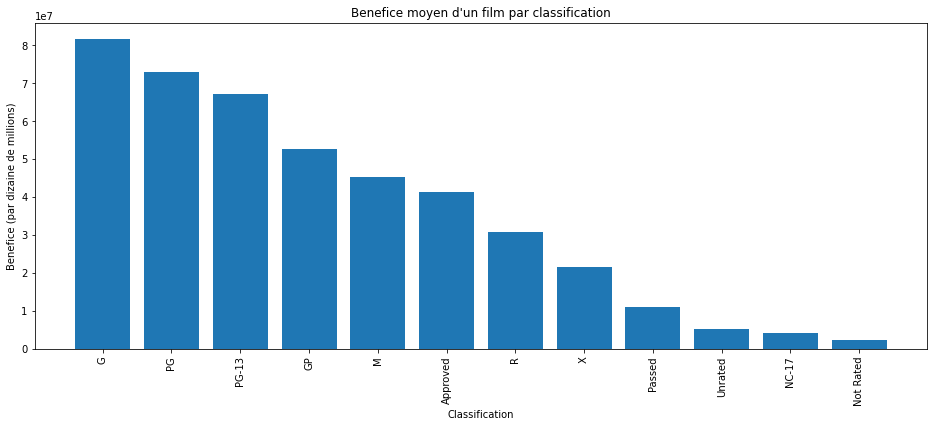

In [157]:
rate = data.groupby("content_rating").gross.mean()
df = pd.DataFrame()
df['country'] = rate.index
df['gross'] = rate.values
df = df.sort_values('gross', ascending=False)

fig, ax = plt.subplots(figsize=(16,6))

ax.bar(df.country, df.gross)
ax.set_xticks(rate.index)
ax.set_xticklabels(labels=rate.index, rotation = 90)

ax.set_xlabel('Classification')
ax.set_ylabel('Benefice (par dizaine de millions)')
ax.set_title("Benefice moyen d'un film par classification")

plt.show()

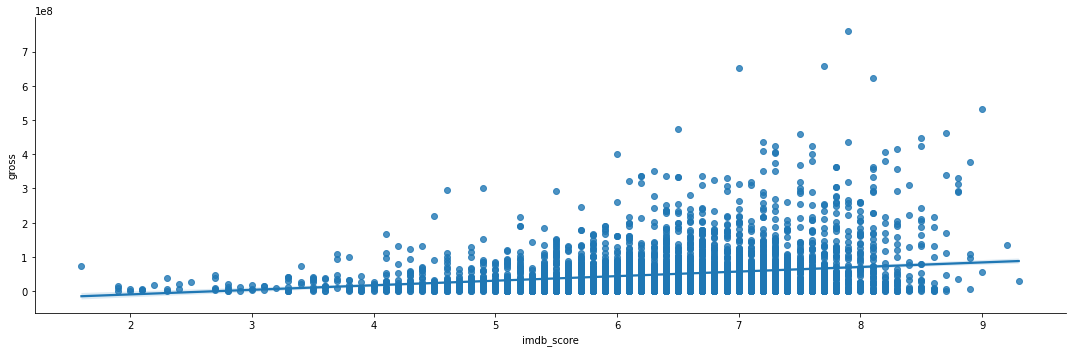

In [158]:
sns.lmplot(data=data, x='imdb_score', y='gross', aspect=3)

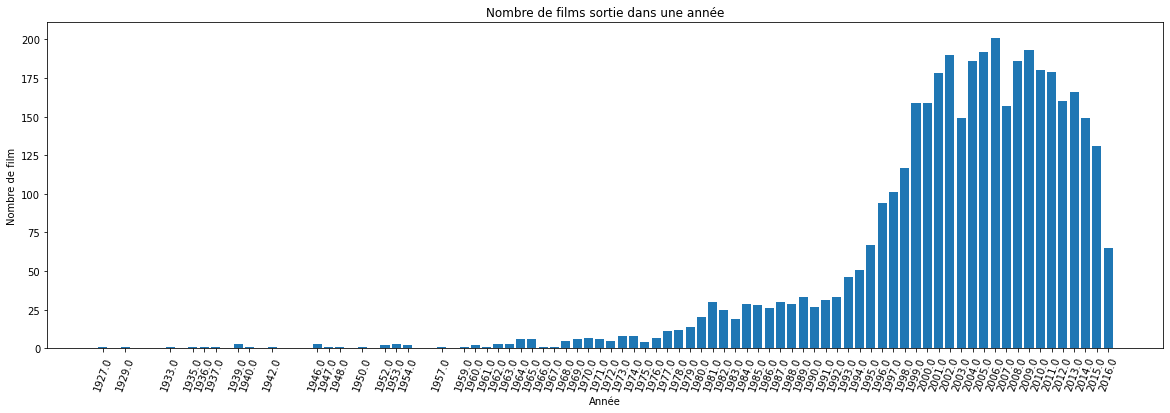

In [159]:
movie = data.title_year.value_counts()
fig, ax = plt.subplots(figsize=(20,6))

ax.bar(movie.index, movie.values)
ax.set_xticks(movie.index)
ax.set_xticklabels(labels=movie.index, rotation = 70)

ax.set_xlabel('Année')
ax.set_ylabel('Nombre de film')
ax.set_title("Nombre de films sortie dans une année")

plt.show()

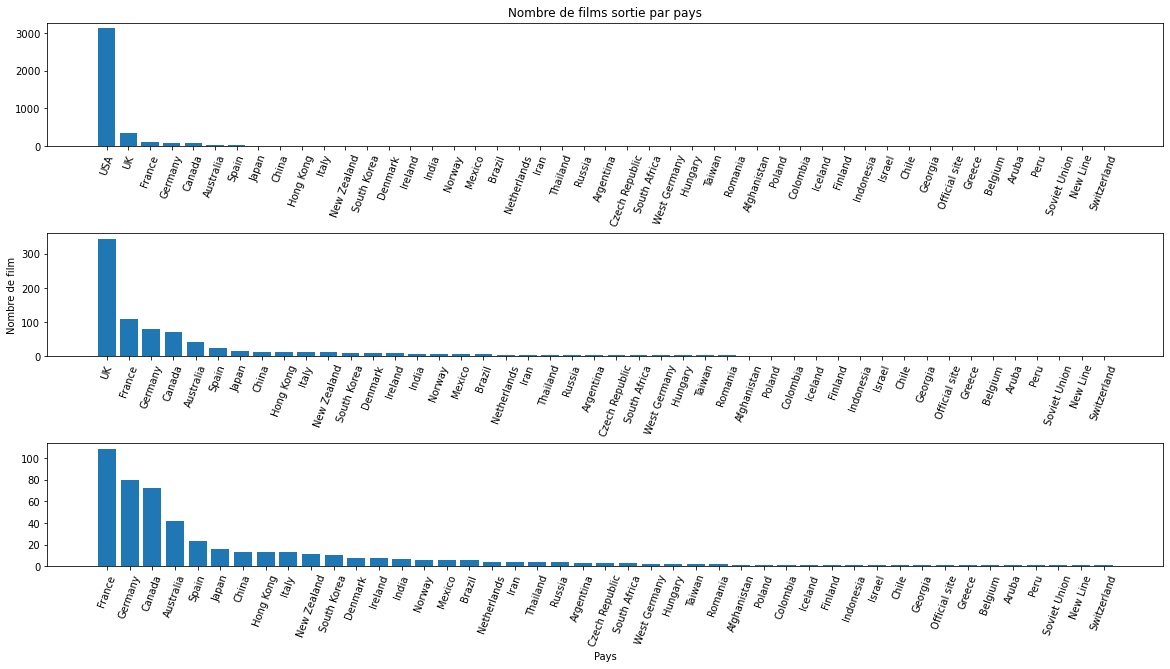

In [160]:
country = data.country.value_counts()
fig, (ax, ax1, ax2) = plt.subplots(3, 1, figsize=(20,10))
plt.subplots_adjust(hspace = 0.7)

ax.bar(country.index, country.values)
ax.set_xticks(country.index)
ax.set_xticklabels(labels=country.index, rotation = 70)
ax.set_title("Nombre de films sortie par pays")

country = country.drop('USA')
ax1.bar(country.index, country.values)
ax1.set_xticks(country.index)
ax1.set_xticklabels(labels=country.index, rotation = 70)

ax1.set_ylabel('Nombre de film')

country = country.drop('UK')
ax2.bar(country.index, country.values)
ax2.set_xticks(country.index)
ax2.set_xticklabels(labels=country.index, rotation = 70)

ax2.set_xlabel('Pays')

plt.show()

<a id='preprocess'></a>

## **5. Pré-traitement**

**À FAIRE**

>Maintenant que vous commencez à bien connaître votre base de données, on va la préparer pour la partie modélisation.
>
>Sont donc attendus dans cette partie :
>- restriction aux données utiles à la prédiction : potentiellement certaines variables conservées pour la visualisation sont à supprimer pour la modélisation
>- création des échantillons d'entraînement et de test
>- gestion des variables catégoriques d'un côté et numériques de l'autre
>
>La standardisation n'étant pas toujours nécessaire puisque ça dépend des modèles, vous pouvez choisir de la faire dès maintenant ou bien d'attendre de voir si vous en avez besoin...

<a id='reglin'></a>

## **6. Une régression linéaire**

**À FAIRE**

>Tout est dans le titre. Vous devez ici entraîner et tester une régression linéaire pour la prédiction de la note IMDB.  
>Par ailleurs, sont attendus ici :
>- un affichage et une interprétation des coefficients et de leur significativité
>- le choix d'une mesure d'évaluation du modèle et son interprétation
>- une validation croisée pour l'estimation de la qualité du modèle
>- *facultatif : l'ajout d'une régularisation Ridge ou Lasso pour déterminer si les résultats sont meilleurs*

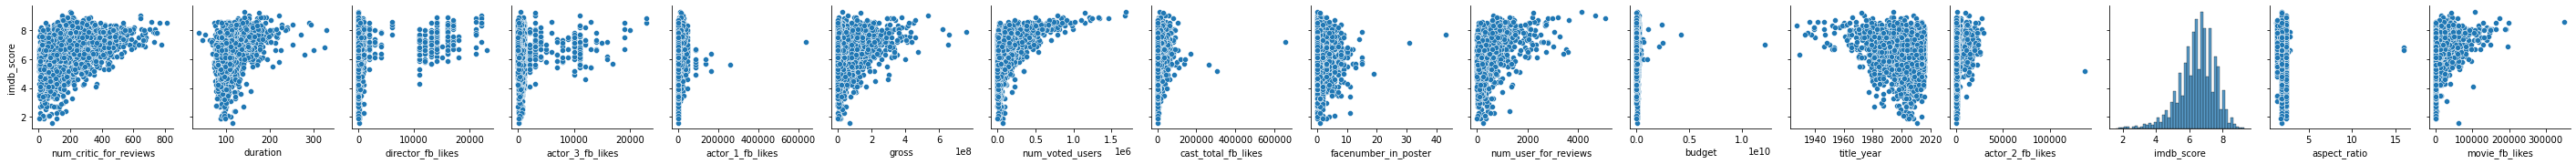

In [161]:
sns.pairplot(data, y_vars=['imdb_score']);

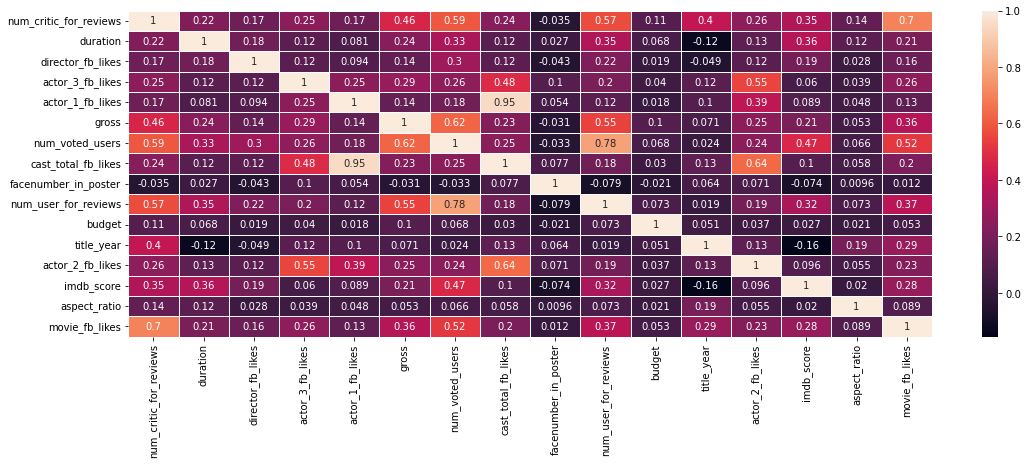

In [162]:
plt.figure(figsize = (18,6))
sns.heatmap(data.corr(), annot=True, linewidths=1);

In [163]:
X = data[['num_critic_for_reviews','duration','director_fb_likes', 'gross', 'num_voted_users', 'cast_total_fb_likes', 'budget','title_year','aspect_ratio', 'movie_fb_likes', 'actor_3_fb_likes', 'actor_1_fb_likes', 'actor_2_fb_likes', 'director_fb_likes']]
y = data.imdb_score

X = pd.concat((X, pd.get_dummies(data.genre, drop_first=True)), axis=1)

In [164]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2968, 31) (990, 31) (2968,) (990,)


In [165]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [166]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

In [167]:
# évaluation R2
sc_train = model.score(X_train, y_train)
sc_test = model.score(X_test, y_test)
print(f"{sc_train=} et {sc_test=}")
#mae

#rmse
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_squared_error(y_test, y_pred, squared=False))
mean_absolute_error(y_test, y_pred)

sc_train=0.41355846915187144 et sc_test=0.4353525051025835
0.7728581590742368


0.5835972144746174

In [168]:
# prédictions
pred = pd.DataFrame()
pred['y_true'] = y_test
pred['y_pred'] = model.predict(X_test)

pred.head()

,y_true,y_pred
3670,5.6,5.937593
147,7.2,7.824282
2854,5.9,5.976462
4522,6.1,5.912671
3127,6.5,6.099109


In [169]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y)

array([0.35010859, 0.43043295, 0.43439292, 0.38621791, 0.21398195])

<a id='autres_reg'></a>

## **7. D'autres modèles de régression**

**À FAIRE**

>Tout est encore dans le titre. Mettez en place le modèle **de régression** que vous souhaitez.  
>Sont donc attendus dans cette partie :
>- une petite phrase pour justifier votre choix
>- les pré-traitements supplémentaires nécessaires s'il y en a
>- évaluation du modèle avec `cross_val_score` ou `cross_validate`
>- affinage des éventuels hyperparamètres avec `GridSearchCV`

<a id='irr'></a>

<a id='reg_to_class'></a>

## **8. De la régression à la classification**

**À FAIRE**

>Transformez le problème de régression en un problème de classification par une discrétisation du score IMDB en 5 classes : nul, bof, sympa, bon, super.  
>Justifiez votre découpage en indiquant quels seuils vous avez utilisé et pourquoi.

In [170]:
def label_decision(row):
    if (row <= 2 ):
        return 'Nul'
    elif (row <= 4):
        return 'Bof'
    elif (row <= 6):
        return'Sympa'
    elif (row <= 8):
        return 'Bon'
    else:
        return'Super'

data['label'] = data['imdb_score'].apply(label_decision)
data[['imdb_score', 'label']].head()

,imdb_score,label
0,7.9,Bon
1,7.1,Bon
2,6.8,Bon
3,8.5,Super
5,6.6,Bon


<a id='reglog'></a>

## **9. Une régression logistique**

**À FAIRE**

>Vous devez ici entraîner et tester une régression logistique pour la prédiction de la classe du film.  
>Par ailleurs, sont attendus ici :
>- un affichage et une interprétation des *Odds-ratio* et de leur significativité
>- le choix d'une ou plusieurs mesures d'évaluation du modèle et leur interprétation
>- une validation croisée pour l'évaluation modèle
>- l'affinage des hyperparamètres avec l'outil qui va bien
>- peut-on tracer les courbes ROC et calculer l'AUC ? Pourquoi ?

In [171]:
data.head(1)

,color,director_name,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,actor_1_name,...,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes,genre,label
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,Action,Bon


In [172]:
X = data[['num_critic_for_reviews','duration','director_fb_likes', 'gross', 'num_voted_users', 'cast_total_fb_likes', 'budget','title_year','aspect_ratio', 'movie_fb_likes', 'actor_3_fb_likes', 'actor_1_fb_likes', 'actor_2_fb_likes', 'director_fb_likes']]
y = data.label

In [173]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2968, 14) (990, 14) (2968,) (990,)


In [174]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X_train, y_train)

y_pred = model.predict(X_test)

# prédictions
pred = pd.DataFrame()
pred['y_true'] = y_test
pred['y_pred'] = model.predict(X_test)



/home/loyk/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<a id='autre_class'></a>

## **10. Un autre modèle de classification**

**À FAIRE**

>Au choix, une autre méthode de classification. Évidemment, sentez-vous libre d'en essayer plus d'une et de les comparer.  
>Sont donc attendus dans cette partie :
>- une petite phrase pour justifier votre choix
>- les pré-traitements supplémentaires nécessaires s'il y en a
>- évaluation du modèle
>- étude de l'importance des paramètres, si votre modèle le permet
>- affinage des éventuels hyperparamètres

<a id='option'></a>

## **11. En option**

Bravo, si vous êtes arrivés jusqu'ici !!!

Pour les flèches, hésitez pas à continuer si vous en voulez encore et pour les autres, hésitez pas à y revenir à l'occasion.

<a id='reco'></a>

### **11.1. Un outil de recommandation**

**À FAIRE**

>Question un peu plus ouverte pour terminer: en utilisant une méthode de clustering (donc d'apprentissage non-supervisé), construisez un petit outil de recommandation de films.  
>Pour un film donné, votre méthode doit donc retourner les films qui lui ressemblent le plus.  
>Pour rappel, on avait fait un petit exercice comme celui-cilorsqu'on avait vu les *k-plus proches voisins*, donc vous êtes invités à ne pas utiliser kNN, sinon c'est pas drôle...  
>Vous pourrez bientôt aller plus loin en créant une petite application web permettant une interface pour choisir un film.

<a id='save'></a>

### **11.2. Sauvegarder un modèle**

**À FAIRE**

>Utilisez le module `pickle` pour sauvegarder le meilleur de vos modèles et le recharger ensuite.

<a id='acp'></a>

### **11.3. Analyse en Composantes Principales**

**À FAIRE**

>Utilisez une ACP pour visualiser vos données en dimension 2 ou 3 avec des points dont la couleur varie en fonction de la classe.  